# **DATOS DE PRESAS DE SONORA**

En esta sección se obtienen las bases de datos de las capacidaddes hídricas de las presas en el estado de Sonora.

Primeramente, agregamos las bilbiotecas que vamos a utilizar.

In [ ]:
import pandas as pd
import requests
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import openpyxl
import missingno as msno
from bs4 import BeautifulSoup

Por medio de *web scraping* obtuvimos la [capacidad hídrica de las presas de Sonora](https://www.sonora.gob.mx/datos/capacidad-hidrica) del portal [Sonora Datos abiertos](https://datos.sonora.gob.mx/) desde el año 1941 hasta el año 2024, con excepción de la década entre 1960 hasta 1969.

In [5]:
resp = requests.get('https://datos.sonora.gob.mx/dataset/Recursos%20H%C3%ADdricos')
soup = BeautifulSoup(resp.text, 'html.parser')
links_datasets = soup.find('section',id='dataset-resources').find_all('ul')
links_cap = []
links_catalogo = []
for link in links_datasets[0].find_all('a',attrs={'target':"_blank"}):
    if link.get('href') != '':
      links_cap.append(link.get('href'))

for link in links_datasets[1].find_all('a',attrs={'target':"_blank"}):
    links_catalogo.append(link.get('href'))
[links_cap,links_catalogo]

[['https://datos.sonora.gob.mx/dataset/ee8f639f-5e89-46ae-93b9-934b05fc6233/resource/f2333c5e-26ea-47c8-93ee-fda5e9106672/download/hidrico_sonora_1941-1949.xlsx',
  'https://datos.sonora.gob.mx/dataset/ee8f639f-5e89-46ae-93b9-934b05fc6233/resource/8826c8a0-75f2-49b0-bf48-907b57c3495d/download/hidrico_sonora_1950-1959.xlsx',
  'https://datos.sonora.gob.mx/dataset/ee8f639f-5e89-46ae-93b9-934b05fc6233/resource/c05fe66a-bdeb-4d53-ba93-beb315b98901/download/hidrico_sonora_1970-1979.xlsx',
  'https://datos.sonora.gob.mx/dataset/ee8f639f-5e89-46ae-93b9-934b05fc6233/resource/ffe3c845-1fc7-4a6c-ab21-3a1db1740fdd/download/hidrico_sonora_1980-1989.xlsx',
  'https://datos.sonora.gob.mx/dataset/ee8f639f-5e89-46ae-93b9-934b05fc6233/resource/fabf0415-7c55-4b01-948f-5cedfb58d4b3/download/hidrico_sonora_1990-1999.xlsx',
  'https://datos.sonora.gob.mx/dataset/ee8f639f-5e89-46ae-93b9-934b05fc6233/resource/458d5daa-d0d1-452d-9524-5ef871f7cbe9/download/hidrico_sonora_2000-2009.xlsx',
  'https://datos.sonor

Los archivos contenidos en estos enlaces están en formato `XLSX`, por lo que serán convertidos a formato `CSV` y guardados.

In [15]:
# Creamos archivos CSV para cada uno y los agregamos a un array que guarde los paths
paths = []
for link in links_cap:
    # Extraer el nombre del archivo del link y cambiar la extensión a .csv
    file_name = link.split("/")[-1].replace(".xlsx", ".csv")
    
    # Leer el archivo Excel desde el link y guardarlo como CSV
    try:
        df = pd.read_excel(link)
        df.to_csv(file_name, index=False)
        paths.append(file_name)
        print(f"Archivo creado: {file_name}")
    except Exception as e:
        print(f"No se pudo procesar el link {link}: {e}")

Archivo creado: hidrico_sonora_1941-1949.csv
Archivo creado: hidrico_sonora_1950-1959.csv
Archivo creado: hidrico_sonora_1970-1979.csv
Archivo creado: hidrico_sonora_1980-1989.csv
Archivo creado: hidrico_sonora_1990-1999.csv
Archivo creado: hidrico_sonora_2000-2009.csv
Archivo creado: hidrico_sonora_2010-2019.csv
Archivo creado: hidrico_sonora_2020-actualidad2024.csv


In [16]:
# Diccionario de claves de presas en Sonora
presas_sonora = {
    "LCDSO": "Presa Lázaro Cárdenas (La Angostura)",
    "CHTSO": "Presa Cuauhtémoc",
    "ARLSO": "Presa Abelardo L. Rodríguez",
    "AOBSO": "Presa Álvaro Obregón (Oviáchic)",
    "ARCSO": "Presa Adolfo Ruiz Cortines (Mocúzari)",
    "PECSO": "Presa Plutarco Elías Calles (El Novillo)",
    "AGZCH": "Presa Abraham González",
    "PMOSO": "Presa Ing. Rodolfo Félix Valdés (El Molinito)",
    "IRASO": "Presa Ignacio R. Alatorre",
    "BICSO": "Presa Bicentenario"
}

In [17]:
# Ejemplo de uso:
print(presas_sonora["AOBSO"])  # Devuelve: Presa Álvaro Obregón (Oviáchic)

Presa Álvaro Obregón (Oviáchic)


In [21]:
#Hacemos una prueba para ver como manejar correctamente la data
df = pd.read_csv("D:/Kevin/MCD/arhbpalr/hidrico_sonora_2020-actualidad2024.csv", names=["clave", "fecha", "almacenamiento_hm3"], skiprows=1, header=None)
df.head()

,clave,fecha,almacenamiento_hm3
0,LCDSO,2020-01-01,738.54
1,PECSO,2020-01-01,2283.69
2,AOBSO,2020-01-01,1683.92
3,AGZCH,2020-01-01,79.10
4,ARCSO,2020-01-01,501.46


In [22]:
# Ahora hacemos una tabla con todos los datos
df_cap = pd.DataFrame()
for path in paths:
  df = pd.read_csv(path, names=["clave", "fecha", "almacenamiento_hm3"], skiprows=1, header=None)
  df_cap = pd.concat([df_cap, df])
  print("Archivo agregado: ", path)
print(df_cap.shape)
df_cap.head()

Archivo agregado:  hidrico_sonora_1941-1949.csv
Archivo agregado:  hidrico_sonora_1950-1959.csv
Archivo agregado:  hidrico_sonora_1970-1979.csv
Archivo agregado:  hidrico_sonora_1980-1989.csv
Archivo agregado:  hidrico_sonora_1990-1999.csv
Archivo agregado:  hidrico_sonora_2000-2009.csv
Archivo agregado:  hidrico_sonora_2010-2019.csv
Archivo agregado:  hidrico_sonora_2020-actualidad2024.csv
(202993, 3)


,clave,fecha,almacenamiento_hm3
0,LCDSO,1941/07/01,0.13
1,CHTSO,1941/07/01,-
2,CHTSO,1941/07/02,-
3,LCDSO,1941/07/02,0.15
4,LCDSO,1941/07/03,0.16


In [28]:
print("Valores únicos en la columna 'clave':")
print(df_cap['clave'].unique())

Valores únicos en la columna 'clave':
['LCDSO' 'CHTSO' 'ARLSO' 'AOBSO' 'ARCSO' 'PECSO' 'AGZCH' 'PMOSO' 'IRASO'
 'BICSO']


In [29]:
# De estos datos vamos a seleccionar solamente los de la Presa Abelardo L. Rodriguez
df_arlso = df_cap[df_cap["clave"] == "ARLSO"].copy() # Use .copy() to avoid SettingWithCopyWarning
df_arlso.loc[:, "almacenamiento_hm3"] = df_arlso["almacenamiento_hm3"].astype(float)
df_arlso.loc[:, "fecha"] = pd.to_datetime(df_arlso["fecha"], format="mixed") # Corrected date format
print(df_arlso.shape)
display(df_arlso.head(20))

(24631, 3)


,clave,fecha,almacenamiento_hm3
4228,ARLSO,1947-04-14 00:00:00,0.09
4229,ARLSO,1947-04-15 00:00:00,0.11
4234,ARLSO,1947-04-16 00:00:00,0.11
4235,ARLSO,1947-04-17 00:00:00,0.12
4240,ARLSO,1947-04-18 00:00:00,0.12
4241,ARLSO,1947-04-19 00:00:00,0.13
4246,ARLSO,1947-04-20 00:00:00,0.14
4247,ARLSO,1947-04-21 00:00:00,0.14
4252,ARLSO,1947-04-22 00:00:00,0.15
4253,ARLSO,1947-04-23 00:00:00,0.15


Ahora contamos con un DataFrame con todos los datos de la capacidad de la presa Abelardo R. Rodriguez de 1941 - 1959 y de 1970 - 2024.

Seguimos con los datos de evapotranspiración; para esto usaremos la API con datos históricos de Open-Meteo.

In [34]:
API_URL = 'https://archive-api.open-meteo.com/v1/archive?latitude=29.1026&longitude=-110.9773&start_date=1940-09-06&end_date=2025-09-20&daily=et0_fao_evapotranspiration&timezone=America%2FLos_Angeles'

response = requests.get(API_URL)
if response.status_code == 200:
    data = response.json()
    print(data)
else:
    print('Error:', response.status_code)

{'latitude': 29.06854, 'longitude': -110.975876, 'generationtime_ms': 1559.4433546066284, 'utc_offset_seconds': -25200, 'timezone': 'America/Los_Angeles', 'timezone_abbreviation': 'GMT-7', 'elevation': 214.0, 'daily_units': {'time': 'iso8601', 'et0_fao_evapotranspiration': 'mm'}, 'daily': {'time': ['1940-09-06', '1940-09-07', '1940-09-08', '1940-09-09', '1940-09-10', '1940-09-11', '1940-09-12', '1940-09-13', '1940-09-14', '1940-09-15', '1940-09-16', '1940-09-17', '1940-09-18', '1940-09-19', '1940-09-20', '1940-09-21', '1940-09-22', '1940-09-23', '1940-09-24', '1940-09-25', '1940-09-26', '1940-09-27', '1940-09-28', '1940-09-29', '1940-09-30', '1940-10-01', '1940-10-02', '1940-10-03', '1940-10-04', '1940-10-05', '1940-10-06', '1940-10-07', '1940-10-08', '1940-10-09', '1940-10-10', '1940-10-11', '1940-10-12', '1940-10-13', '1940-10-14', '1940-10-15', '1940-10-16', '1940-10-17', '1940-10-18', '1940-10-19', '1940-10-20', '1940-10-21', '1940-10-22', '1940-10-23', '1940-10-24', '1940-10-25', 

In [35]:
df_evapo = pd.DataFrame(data['daily'])
df_evapo["time"] = pd.to_datetime(df_evapo["time"])
print(df_evapo.shape)
df_evapo.head()

(31061, 2)


,time,et0_fao_evapotranspiration
0,1940-09-06,7.06
1,1940-09-07,7.15
2,1940-09-08,6.90
3,1940-09-09,6.90
4,1940-09-10,7.33


In [36]:
# Ahora fusionamos ambos DataFrames y descartamos la columna 'time' para evitar duplicados
df_arlso['fecha'] = pd.to_datetime(df_arlso['fecha'])
df_final = pd.merge(df_arlso, df_evapo, left_on='fecha', right_on='time')
df_final = df_final.drop(columns=['time'])
df_final.columns = ['clave', 'fecha', 'almacenamiento_hm3', 'evapotranspiracion']
df_final["almacenamiento_hm3"] = df_final["almacenamiento_hm3"].astype(float)
df_final["evapotranspiracion"] = df_final["evapotranspiracion"].astype(float)
print(df_final.shape)
df_final.head()

(24631, 4)


,clave,fecha,almacenamiento_hm3,evapotranspiracion
0,ARLSO,1947-04-14,0.09,9.04
1,ARLSO,1947-04-15,0.11,7.89
2,ARLSO,1947-04-16,0.11,7.79
3,ARLSO,1947-04-17,0.12,8.71
4,ARLSO,1947-04-18,0.12,8.94


In [37]:
df_final.describe()

,fecha,almacenamiento_hm3,evapotranspiracion
count,24631,24631.000000,24631.000000
mean,1989-02-11 02:30:29.012220288,64.447475,5.710623
min,1947-04-14 00:00:00,0.000000,0.390000
25%,1974-02-21 12:00:00,1.275000,4.050000
50%,1991-01-01 00:00:00,42.890000,5.670000
75%,2007-11-10 12:00:00,110.115000,7.350000
max,2024-09-19 00:00:00,300.320000,13.280000
std,NaN,69.911783,2.048717


In [ ]:
# EDA: relación entre almacenamiento (hm3) y evapotranspiración
# Usa df_final ya presente en el notebook

df_eda = df_final.copy()

# 1) Resumen numérico
print("Filas:", len(df_eda))
print("\nDescripción estadística:")
print(df_eda[['almacenamiento_hm3', 'evapotranspiracion']].describe())

# Correlaciones globales
pearson = df_eda['almacenamiento_hm3'].corr(df_eda['evapotranspiracion'], method='pearson')
spearman = df_eda['almacenamiento_hm3'].corr(df_eda['evapotranspiracion'], method='spearman')
print(f"\nCorrelación Pearson: {pearson:.4f}")
print(f"Correlación Spearman: {spearman:.4f}")

# 2) Scatter + regresión (lineal y suavizada)
plt.figure(figsize=(8,6))
sns.regplot(x='evapotranspiracion', y='almacenamiento_hm3', data=df_eda,
            scatter_kws={'s':10, 'alpha':0.3}, line_kws={'color':'red'}, lowess=True)
plt.xlabel('Evapotranspiración (mm/día)')
plt.ylabel('Almacenamiento (hm3)')
plt.title('Scatter: Almacenamiento vs Evapotranspiración (con suavizado)')
plt.grid(alpha=0.3)
plt.show()

# 3) Densidad / hexbin para ver concentración de puntos
sns.jointplot(x='evapotranspiracion', y='almacenamiento_hm3', data=df_eda, kind='hex', height=8, marginal_kws=dict(bins=30))
plt.suptitle('Densidad: Almacenamiento vs Evapotranspiración', y=1.02)
plt.show()

# 4) Series temporales (resample mensual): tendencia conjunta
df_ts = df_eda.set_index('fecha').sort_index().resample('M').mean()
plt.figure(figsize=(12,5))
ax = df_ts['almacenamiento_hm3'].plot(label='Almacenamiento (hm3)', color='tab:blue')
ax2 = ax.twinx()
df_ts['evapotranspiracion'].plot(ax=ax2, label='Evapotranspiración (mm/día)', color='tab:orange', alpha=0.9)
ax.set_ylabel('Almacenamiento (hm3)')
ax2.set_ylabel('Evapotranspiración (mm/día)')
ax.set_title('Serie mensual promedio: almacenamiento vs evapotranspiración')
ax.grid(alpha=0.2)
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines+lines2, labels+labels2, loc='upper right')
plt.show()

# 5) Correlación por año (medias anuales)
df_eda['year'] = df_eda['fecha'].dt.year
annual = df_eda.groupby('year')[['almacenamiento_hm3','evapotranspiracion']].mean().dropna()
annual_corr = annual['almacenamiento_hm3'].corr(annual['evapotranspiracion'])
print(f"\nCorrelación entre medias anuales: {annual_corr:.4f}")

plt.figure(figsize=(8,5))
sns.scatterplot(x='evapotranspiracion', y='almacenamiento_hm3', data=annual)
sns.regplot(x='evapotranspiracion', y='almacenamiento_hm3', data=annual, scatter=False, line_kws={'color':'red'})
plt.title('Medias anuales: almacenamiento vs evapotranspiración')
plt.show()

# 6) Estacionalidad: boxplot por mes
df_eda['month'] = df_eda['fecha'].dt.month
plt.figure(figsize=(10,4))
sns.boxplot(x='month', y='evapotranspiracion', data=df_eda, palette='Spectral')
plt.title('Distribución mensual de evapotranspiración')
plt.xlabel('Mes')
plt.show()

plt.figure(figsize=(10,4))
sns.boxplot(x='month', y='almacenamiento_hm3', data=df_eda, palette='Blues')
plt.title('Distribución mensual de almacenamiento (hm3)')
plt.xlabel('Mes')
plt.show()

# 7) Correlación móvil (rolling) en ventanas anuales sobre datos diarios
df_daily = df_eda.set_index('fecha').sort_index().resample('D').mean()
rolling_corr = df_daily['almacenamiento_hm3'].rolling(window=365, min_periods=90).corr(df_daily['evapotranspiracion'])
plt.figure(figsize=(12,4))
rolling_corr.plot(color='purple')
plt.axhline(0, color='k', linestyle='--', alpha=0.6)
plt.title('Correlación móvil (365 días) entre almacenamiento y evapotranspiración')
plt.ylabel('Correlación')
plt.show()

# 8) Resumen final breve
print("\nResumen rápido:")
print("- Correlación Pearson y Spearman globales arriba mostradas.")
print("- Revisar la gráfica de dispersión y la correlación móvil: la relación puede ser débil y/o no lineal.")
print("- Analizar estacionalidad y lags (p. ej. evaporación alta puede preceder reducciones en almacenamiento); si se quiere, calcular correlaciones con desfases (lags).")

In [31]:
import missingno as msno

# **Visualizacion de missing data**

<Axes: >

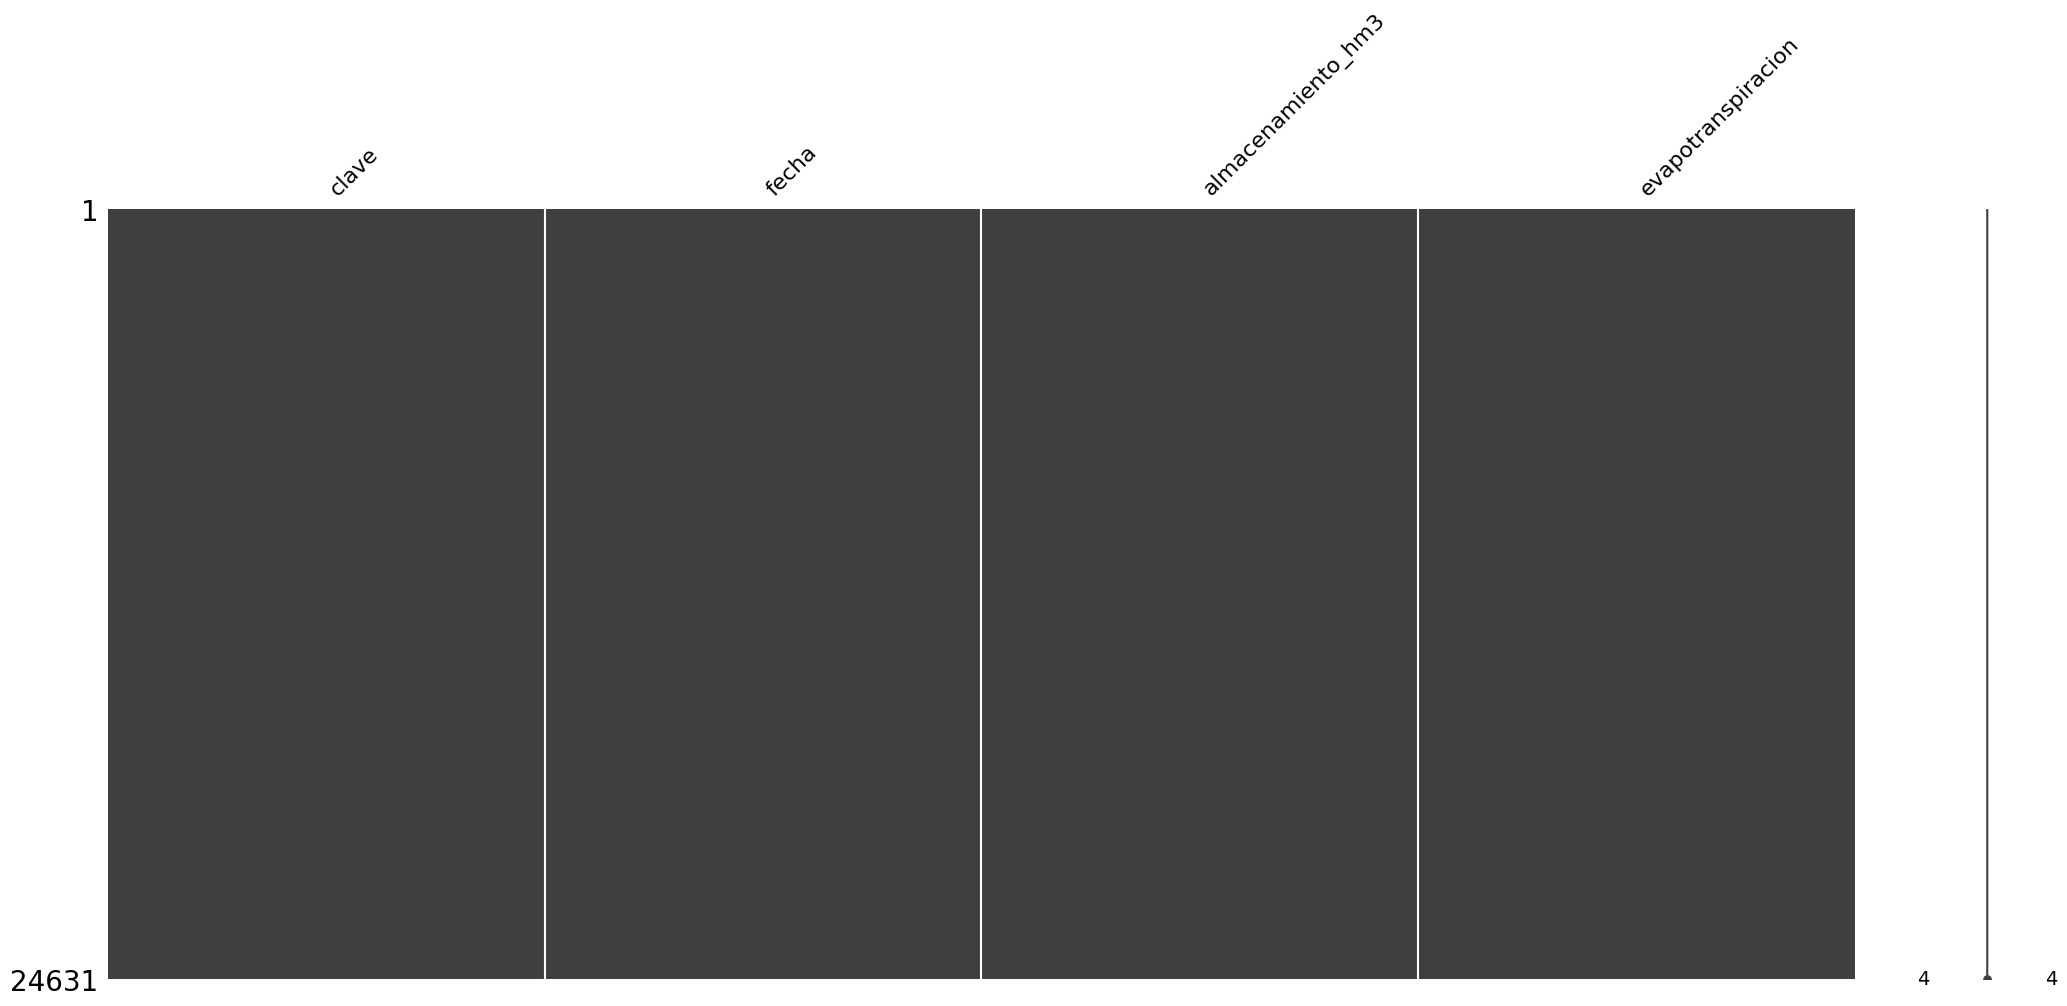

In [38]:
msno.matrix(df_final)

## **Aqui se deja el codigo para cargar datos metereologicos mas completos de openmeteo**

In [53]:
API_URL_full = "https://archive-api.open-meteo.com/v1/archive?latitude=29.067999&longitude=-110.910734&start_date=1940-01-01&end_date=2024-12-31&daily=rain_sum,precipitation_sum,et0_fao_evapotranspiration,temperature_2m_max,shortwave_radiation_sum,wind_speed_10m_max,temperature_2m_min,temperature_2m_mean,soil_moisture_0_to_7cm_mean,soil_moisture_0_to_100cm_mean,soil_moisture_28_to_100cm_mean,soil_moisture_7_to_28cm_mean,vapour_pressure_deficit_max,relative_humidity_2m_mean,dew_point_2m_mean,wind_speed_10m_mean,cloud_cover_mean&hourly=temperature_2m&timezone=auto"

In [54]:
response = requests.get(API_URL_full)
if response.status_code == 200:
    data_full = response.json()
    print(data_full)
else:
    print('Error:', response.status_code)

Error: 429
